### Traveling Salesman Problem - Ant Colony Optimization 

In [1]:
from sko.ACA import ACA_TSP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv('./data/distances.csv')
df.head()

,Unnamed: 0,Start,Target,Distance
0,0,Aberdeen,Aberdeen,0
1,1,Aberdeen,Adelaide,16192
2,2,Aberdeen,Algiers,2291
3,3,Aberdeen,Amsterdam,696
4,4,Aberdeen,Ankara,3158


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Start,Target,Distance
0,Aberdeen,Aberdeen,0
1,Aberdeen,Adelaide,16192
2,Aberdeen,Algiers,2291
3,Aberdeen,Amsterdam,696
4,Aberdeen,Ankara,3158


In [4]:
cities = df['Start'].unique()
cities_index = dict(zip(cities, range(len(cities))))
df['Start'] = [cities_index[city] for city in df['Start']]
df['Target'] = [cities_index[city] for city in df['Target']]

df.head()

,Start,Target,Distance
0,0,0,0
1,0,1,16192
2,0,2,2291
3,0,3,696
4,0,4,3158


In [5]:
start = df['Start'].to_list()
new_df = pd.DataFrame(columns=set(start))

for i in start:
    rows = df.loc[df['Start'] == i]
    distances = rows['Distance'].to_list()
    new_df.loc[i] = distances
     
new_df

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0,16192,2291,696,3158,10521,2849,17748,9469,1779,...,4602,9093,2933,1639,8463,1583,8072,1575,18237,1306
1,16192,0,16045,15908,13621,13108,14301,3244,6739,16180,...,11934,7849,15036,15392,14388,15114,8708,14816,3219,15694
2,2291,16045,0,1733,2617,9376,1830,19281,9746,511,...,4322,10800,1024,1233,9520,1668,9735,2216,19150,1254
3,696,15908,1733,0,2540,10538,2165,18118,9175,1238,...,4083,9293,2260,942,9051,932,8245,1093,18565,615
4,3158,13621,2617,2540,0,11820,824,16696,7128,2587,...,1713,8765,1921,1784,11591,1610,7724,1644,16817,2119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1583,15114,1668,932,1610,10980,1287,17854,8443,1350,...,3202,9132,1719,435,9981,0,8067,554,18154,591
116,8072,8708,9735,8245,7724,17837,8460,9892,4441,9359,...,6672,1066,9514,8502,11518,8067,0,7519,10320,8525
117,1575,14816,2216,1093,1644,11475,1600,17349,8091,1864,...,3030,8583,2234,985,10036,554,7519,0,17695,1045
118,18237,3219,19150,18565,16817,10855,17521,491,9746,19400,...,15109,9272,18143,18526,11321,18154,10320,17695,0,18733


In [6]:
distance_matrix = new_df.to_numpy().astype('float64')

In [7]:
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [8]:
max_iter = [50, 100, 150]
acas = []

for i in tqdm(max_iter):
    aca = ACA_TSP(func=cal_total_distance, n_dim=len(set(start)),
                size_pop=50, max_iter=i,
                distance_matrix=distance_matrix)
    aca.run()
    acas.append(aca)

100%|██████████| 3/3 [03:11<00:00, 63.79s/it]


In [9]:
for aca in acas:
    print(f"Min Distance :{aca.best_y} km Iterations : {aca.max_iter}")

Min Distance :216408.0 km Iterations : 50
Min Distance :168154.0 km Iterations : 100
Min Distance :126858.0 km Iterations : 150


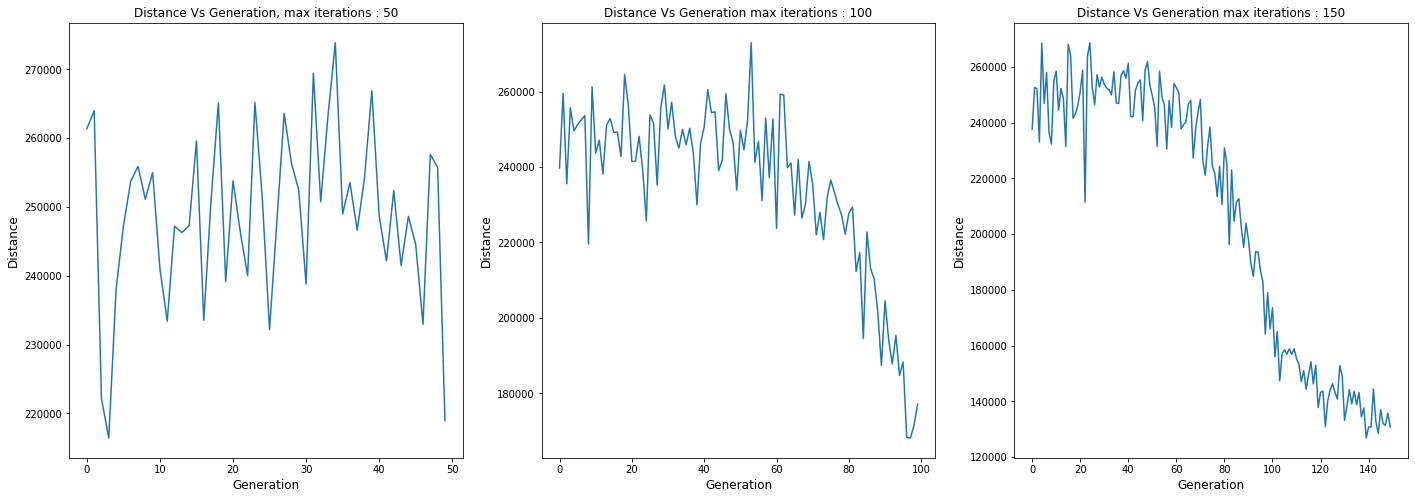

In [10]:
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.plot(acas[0].y_best_history)
plt.xlabel("Generation", fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title("Distance Vs Generation, max iterations : 50")

plt.subplot(1, 3, 2)
plt.plot(acas[1].y_best_history)
plt.xlabel("Generation", fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title("Distance Vs Generation max iterations : 100")

plt.subplot(1, 3, 3)
plt.plot(acas[2].y_best_history)
plt.xlabel("Generation", fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title("Distance Vs Generation max iterations : 150")
plt.show()

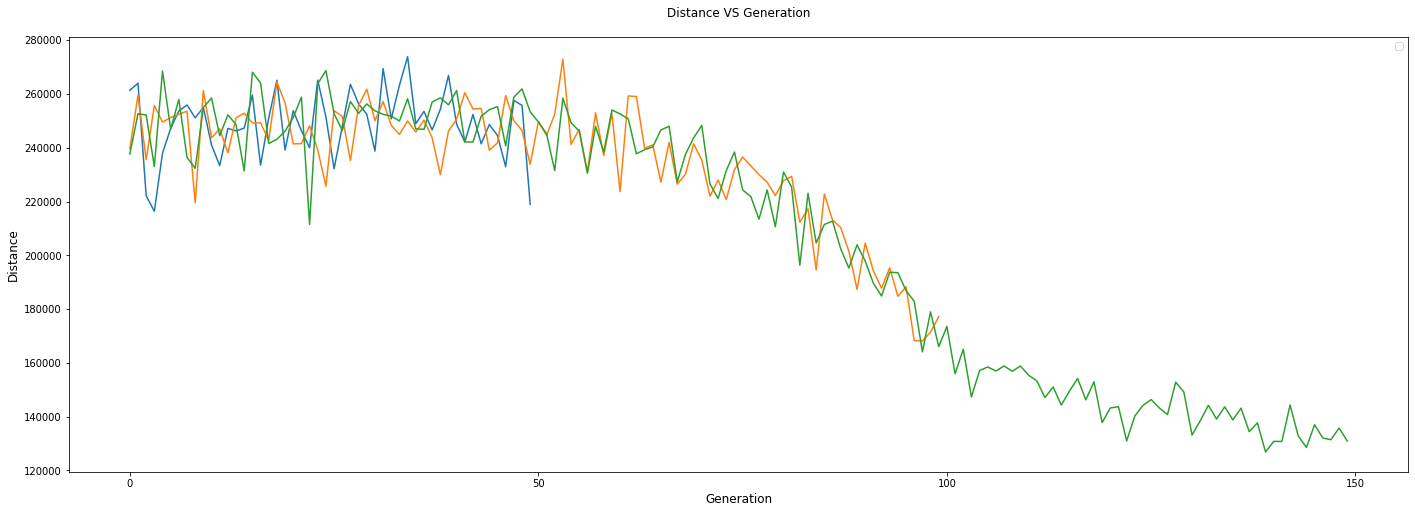

In [11]:
plt.figure(figsize=(24, 8))

plt.title("Distance VS Generation", pad=20)
plt.xlabel("Generation", fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.xticks([0, 50, 100, 150])
plt.legend(["50 iterations", "100 iterations", "150 iterations"])

plt.plot(acas[0].y_best_history)
plt.plot(acas[1].y_best_history)
plt.plot(acas[2].y_best_history)
plt.show()